# Complex Systems
Author: Alan Palma

## **Excercise 4:** Globally Coupled Map Networks


Consider the globally coupled map network, for $ i = 1, 2, \ldots, N = 10^{3} $,

$$
x_{t+1}(i) = (1 - \varepsilon)f(x_{t}(i)) + \frac{\varepsilon}{N}\sum_{j=1}^{N}f(x_{t}(j)),
$$

where $x_{t}(i)$ denotes the state of map $i$ at discrete time $t$, $\varepsilon$ is the coupling strength, and $f(x) = \sin^{2}[r \sin^{-1}(\sqrt{x})]$, $x $ in $[0, 1]$  describes the local dynamics.

The mean field of the system at time \( t \) is

$$
S_{t} = \frac{1}{N}\sum_{j=1}^{N}f(x_{t}(j)).
$$

Consider initial conditions $\{x_{0}(i)\}$ randomly and uniformly distributed on the interval $x_{0}(i)$ in $[0, 1]$.

**a)** Plot the simultaneous time series of $S_{t}$ and one map $x_{t}(i)$ in the coupled system for fixed parameter values $r = 3.5$ and $ \varepsilon = 0.48$, after discarding $10^{2}$ transients. 

**b)** What phenomenon is observed?

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scienceplots
import os

# Define the style
plt.style.use(['science', 'notebook', 'no-latex']) # Use a specific style for figures

In [140]:
# Create an output directory for figures

output_dir = "figures_ex4"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Directory '{output_dir}' created.")
else:
    print(f"Directory '{output_dir}' already exists.")

Directory 'figures_ex4' created.


In [141]:
def f(r, x):
    """
    Compute the function f(r, x) = r * arcsin(sqrt(x))
    """

    fval = np.sin(r * np.arcsin(np.sqrt(x)))**2

    fval = np.array(fval, dtype=np.float64)

    return fval

In [142]:
# Define a seed for reproducibility
np.random.seed(23)

# Define inital conditions
N = 1e3
x0 =  np.random.uniform(0, 1, int(N))

# Define parameters
r = 3.5
eps = 0.48

# Create time array
t_steps = 1000
tf = 5
t_arr = np.linspace(0, tf, t_steps, dtype=np.float64)

# Define the adjacency matrix (matrix of ones)
A = np.ones((int(N), int(N)), dtype=np.float64)

In [143]:
# Empty list to save the time series
xt = []

# Time evolution
for t in range(int(t_steps)):

    # Update the state using the coupling equation
    x = (1 - eps) * f(r, x0) + (eps / N) * (A @ f(r, x0))
    xt.append(x)

    # Update x0 for the next iteration
    x0 = x

xt = np.array(xt)

In [144]:
# Compute the mean field
s = np.mean(xt, axis=1)

# Selecr on elements to plot
j = random.sample(range(int(N)), 1)
x_plot = xt[:, j]

# Discard the transient (10^2)
transient = 100
s_plot = s[transient:]
t_plot = t_arr[transient:]
x_plot = x_plot[transient:]

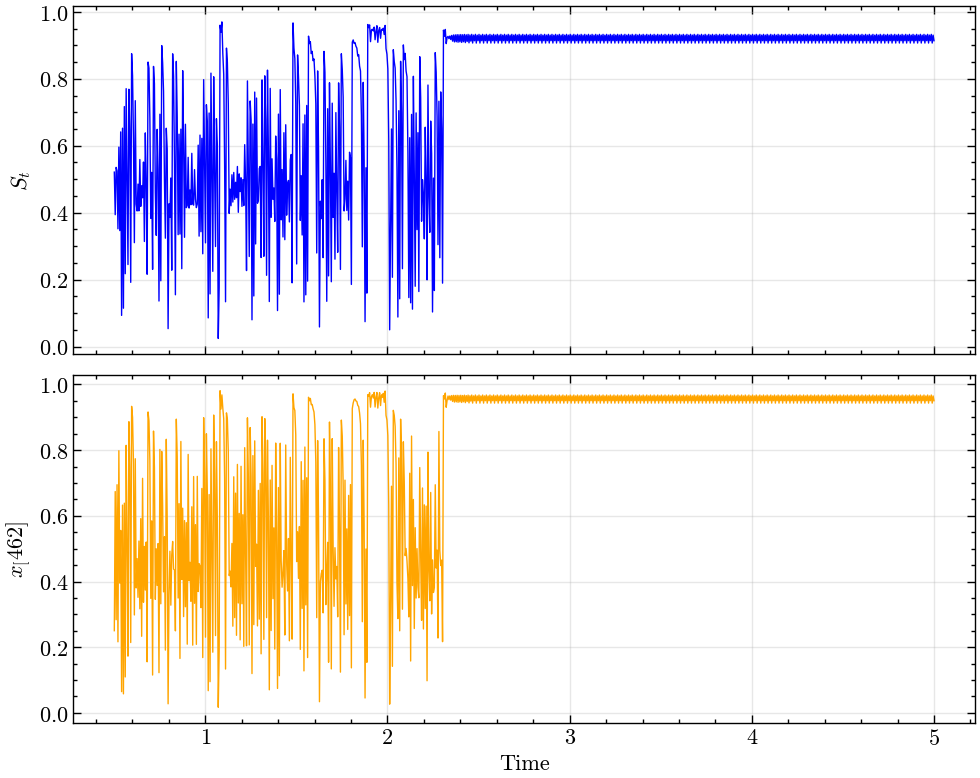

In [145]:
# Plot the time series of the mean field and some individual elements in a two-panel figure
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Mean field
ax[0].plot(t_plot, s_plot, lw = 1.0, color='blue')
# ax[0].set_title('Mean Field')
ax[0].set_ylabel(r'$S_t$')
ax[0].grid(alpha=0.3)

# Individual element (j)
ax[1].plot(t_plot, x_plot, lw = 1.0, color='orange')
# ax[1].set_title(f'Element {j}')
ax[1].set_ylabel(f'$x_{j}$')
ax[1].set_xlabel('Time')
ax[1].grid(alpha=0.3)

plt.tight_layout()

plt.savefig(f"{output_dir}/time_series.png", dpi=300)
plt.show()

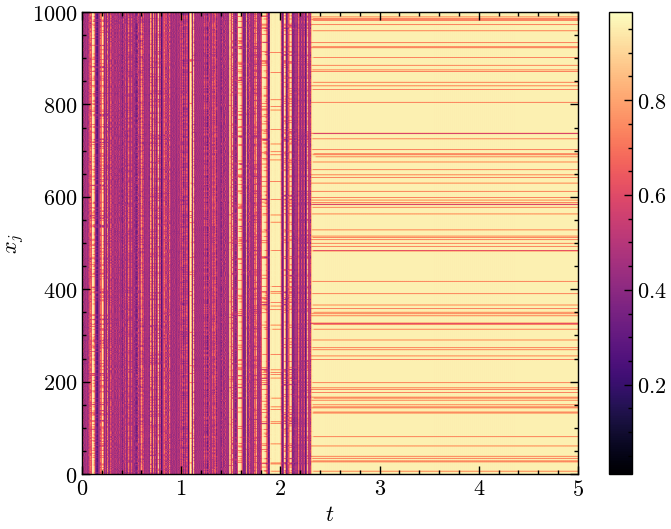

In [146]:
# Create a 2D figure of the results (time vs element index)

fig, ax = plt.subplots(figsize=(8, 6)) 
c = ax.imshow(xt.T[100:], aspect='auto', cmap='magma', extent=[0, tf, 0, N], origin='lower')
ax.set_xlabel('$t$')
ax.set_ylabel(r'$x_j$')
fig.colorbar(c, ax=ax)
# plt.title('Time Evolution of Elements')
plt.savefig(f"{output_dir}/spatiotemporal.png", dpi=300)
plt.show()

## **Excercise 5:Cellular Automata** 

Consider a cellular automata model of an excitable medium in a two-dimensional lattice with periodic boundary conditions. Site $i$ has coordinates ($i_1, i_2$), where $i_1, i_2$ $\in$ $\mathbb{Z}$; $i = 1, 2$, $\ldots$, $N \times N$. The possible states of site $i$ at a time $t$ are the discrete values: $x_i(t)$ $\in$ $\{Q \, (\text{rest}), E \, (\text{excited}), R \, (\text{recovered})\}$. Let $j$ $\in$ $\nu_i$, where $\nu_i$ is the set of neighbors of $i$. The dynamics of the system is given by the following rules:

$$
x_i(t+1) =
\begin{cases}
E, & \text{if } x_i(t) = Q \text{ and } \exists j \in \nu_i \text{ such that } x_j(t) = E. \\
R, & \text{if } x_i(t) = E. \\
Q, & \text{if } x_i(t) \in \{Q, R\} \; \text{and} \; x_j(t) \in \{Q,R\}.
\end{cases}
$$

Use a programming language of your choice to implement this cellular automata. Try both, Von Neumann and Moore neighborhoods on two-dimensional lattice. You may give color codes to the states $Q$, $R$ and $E$, for visualization. Show the spatiotemporal patterns that arise in this system for different initial conditions.

In [221]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import time
import scienceplots
import os

# Define the style
plt.style.use(['science', 'notebook', 'no-latex']) # Use a specific style for figures

In [222]:
# Create an output directory for figures

output_dir2 = "figures_ex5"
if not os.path.exists(output_dir2):
    os.makedirs(output_dir2)
    print(f"Directory '{output_dir2}' created.")
else:
    print(f"Directory '{output_dir2}' already exists.")

Directory 'figures_ex5' already exists.


In [376]:
class ExcitableMediaCA:

    def __init__(self, N=100, neighborhood_type='moore'):
        """
        Initialize the excitable media cellular automata
        
        Parameters:
        N: grid size (N x N)
        neighborhood_type: 'moore' (8 neighbors) or 'von_neumann' (4 neighbors)
        """
        self.N = N
        self.neighborhood_type = neighborhood_type
        
        # State definitions
        self.Q = 0  # Resting
        self.E = 1  # Excited
        self.R = 2  # Refractory/Recovered
        
        # Color map for visualization
        self.cmap = colors.ListedColormap(['green', 'red', 'yellow'])
        self.bounds = [0, 1, 2, 3]
        self.norm = colors.BoundaryNorm(self.bounds, self.cmap.N)
        
        # Initialize grid with all cells in resting state
        self.grid = np.full((N, N), self.Q, dtype=int)
        
    def get_neighbors(self, i, j):
        """Get coordinates of neighbors based on neighborhood type"""

        neighbors = []
        
        if self.neighborhood_type == 'Moore':
            # Moore neighborhood (8 neighbors)
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue  # Skip the cell itself
                    ni, nj = (i + di) % self.N, (j + dj) % self.N
                    neighbors.append((ni, nj))
                    
        elif self.neighborhood_type == 'Von-Neumann':
            # Von Neumann neighborhood (4 neighbors)
            for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                ni, nj = (i + di) % self.N, (j + dj) % self.N
                neighbors.append((ni, nj))
                
        return neighbors
    
    def update(self):
        """Update the grid according to the excitable media rules"""
        new_grid = self.grid.copy()
        
        for i in range(self.N):
            for j in range(self.N):
                current_state = self.grid[i, j]
                neighbors = self.get_neighbors(i, j)
                
                # Rule 1: Q -> E if any neighbor is E
                if current_state == self.Q:
                    has_excited_neighbor = any(self.grid[ni, nj] == self.E 
                                             for ni, nj in neighbors)
                    if has_excited_neighbor:
                        new_grid[i, j] = self.E
                
                # Rule 2: E -> R (excited becomes refractory)
                elif current_state == self.E:
                    new_grid[i, j] = self.R
                
                # Rule 3: R -> Q (refractory becomes resting)
                elif current_state == self.R or current_state == self.Q:

                    # Check if the neighbors contain Q or R
                    has_neighborQ = any(self.grid[ni, nj] == self.Q 
                                             for ni, nj in neighbors)
                    has_neighborR = any(self.grid[ni, nj] == self.R 
                                             for ni, nj in neighbors)

                    if has_neighborQ or has_neighborR:
                        new_grid[i, j] = self.Q
                # Q remains Q if no excited neighbors (handled by initialization)
        
        self.grid = new_grid
        return self.grid

    def set_initial_condition(self, condition_type='Single-Excitation'):
        """Set different initial conditions"""

        self.grid = np.full((self.N, self.N), self.Q, dtype=int)
        
        if condition_type == 'Single-Excitation':
            # Single excited cell in the center
            center = self.N // 2
            self.grid[center, center] = self.E
            
        elif condition_type == 'Multiple-Excitations':
            # Multiple excited cells
            centers = [(self.N//4, self.N//4), (self.N//4, 3*self.N//4),
                      (3*self.N//4, self.N//4), (3*self.N//4, 3*self.N//4)]
            for ci, cj in centers:
                self.grid[ci, cj] = self.E
                
        elif condition_type == 'Line-Excitation':
            # Horizontal line of excited cells
            center = self.N // 2
            self.grid[center, :] = self.E
            # Vertical line of refractory cells
            self.grid[:, center] = self.R
            
        elif condition_type == 'Random-Excitation':
            # Random excited cells (10% of grid)
            # Define a seed for reproducibility
            np.random.seed(1247)
            random_mask = np.random.random((self.N, self.N)) < 0.1
            self.grid[random_mask] = self.E

            random_mask_R = np.random.random((self.N, self.N)) < 0.1
            self.grid[random_mask_R] = self.R
    
    def simulate_steps(self, steps, initial_condition='single_excitation'):
        """Run simulation for specified number of steps"""
        
        # Setup initial conditions
        self.set_initial_condition(initial_condition)

        # Setup steps
        self.steps = steps
        self.ic = initial_condition

        grids = [self.grid.copy()]
        for step in range(steps):
            self.update()
            grids.append(self.grid.copy())
        
        self.grids = np.array(grids)

        return np.array(grids)
    
    def plot_frame(self, step, outdir=False):
        """Plot the grid at a specific time step"""

        # Show intial contidion
        plt.figure(figsize=(6, 6))
        plt.imshow(self.grids[step], cmap=self.cmap, origin='lower', vmin=0, vmax=2)

        # Add the color code
        cbar = plt.colorbar(ticks=[0.33, 0.99, 1.65], shrink=0.3)
        cbar.ax.set_yticklabels(['Resting (Q)', 'Excited (E)', 'Refractory (R)'], fontsize=10)

        plt.title(f'IC: {self.ic}\n' + f'NG: {self.neighborhood_type}\n' + f't = {step}')
        plt.xlabel(r'$i$')
        plt.ylabel(r'$j$')

        if outdir:
            plt.savefig(f"{outdir}/excitable_media_step_{step:03d}.png", dpi=300)
            plt.close()
        else:
            plt.show()

    def animate(self, outdir=False):
        """Create an animation of the simulation"""

        outdir2 = f'ng_{self.neighborhood_type}' + f'_ic_{self.ic}' \
                      + f'_N_{self.N}' + f'_steps_{self.steps}'

        # Create a output directory for figures
        if outdir:
            if not os.path.exists(outdir + '/' + outdir2):
                os.makedirs(outdir + '/' + outdir2)
                print(f"Directory '{outdir + '/' + outdir2}' created.")
            else:
                print(f"Directory '{outdir + '/' + outdir2}' already exists.")

            outdir_gif = outdir + '/' + outdir2
        else:
            if not os.path.exists(outdir2):
                os.makedirs(outdir2)
                print(f"Directory '{outdir2}' created.")
            else:
                print(f"Directory '{outdir2}' already exists.")

            outdir_gif = outdir2

        fig, ax = plt.subplots(figsize=(6, 6))
        img = ax.imshow(self.grids[0], cmap=self.cmap, origin='lower')

        # Add the color code
        cbar = plt.colorbar(img, ticks=[0.33, 0.99, 1.65], shrink=0.3)
        cbar.ax.set_yticklabels(['Resting (Q)', 'Excited (E)', 'Refractory (R)'], fontsize=10)

        def update(frame):
            img.set_array(self.grids[frame])
            ax.set_title(f'IC: {self.ic}\n' + f'NG: {self.neighborhood_type}\n' + f't = {frame}')
            ax.set_xlabel(r'$i$')
            ax.set_ylabel(r'$j$')
            
            return [img]

        ani = FuncAnimation(fig, update, frames=len(self.grids), blit=True, interval=100)

        if outdir:
            ani.save(f"{outdir_gif}/excitable_media_animation.gif", writer='imagemagick', fps=10)
            print(f"Animation saved to '{outdir_gif}/excitable_media_animation.gif'")
            plt.close()
        else:
            plt.show()

        return ani

### Simulations Using Moore Neighbors

In [377]:
test = ExcitableMediaCA(N=100, neighborhood_type='Moore')
grids_res = test.simulate_steps(steps=100, initial_condition='Single-Excitation')

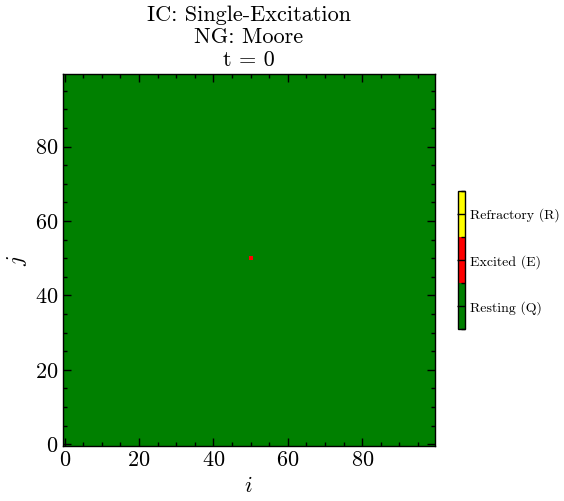

In [252]:
test.plot_frame(step=0)

In [253]:
animation = test.animate(outdir='figures_ex5')

Directory 'figures_ex5/ng_Moore_ic_Single-Excitation_N_100_steps_100' already exists.
Animation saved to 'figures_ex5/ng_Moore_ic_Single-Excitation_N_100_steps_100/excitable_media_animation.gif'


In [254]:
sol2 = ExcitableMediaCA(N=100, neighborhood_type='Moore')
grids_sol2 = sol2.simulate_steps(steps=100, initial_condition='Multiple-Excitations')

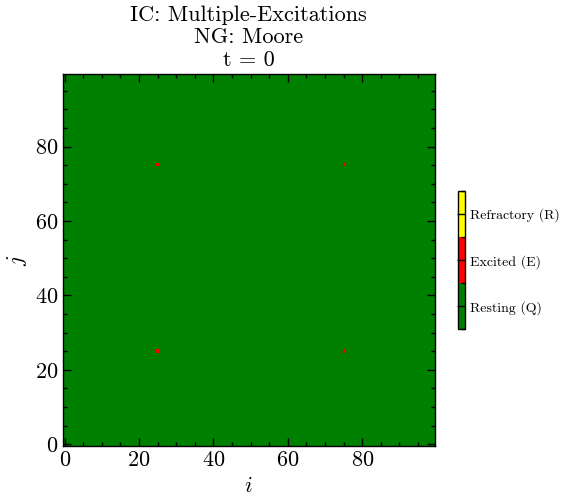

In [255]:
sol2.plot_frame(step=0)

In [256]:
sol2.animate(outdir='figures_ex5')

Directory 'figures_ex5/ng_Moore_ic_Multiple-Excitations_N_100_steps_100' already exists.
Animation saved to 'figures_ex5/ng_Moore_ic_Multiple-Excitations_N_100_steps_100/excitable_media_animation.gif'


In [257]:
sol3 = ExcitableMediaCA(N=100, neighborhood_type='Moore')
grids_sol3 = sol3.simulate_steps(steps=100, initial_condition='Line-Excitation')

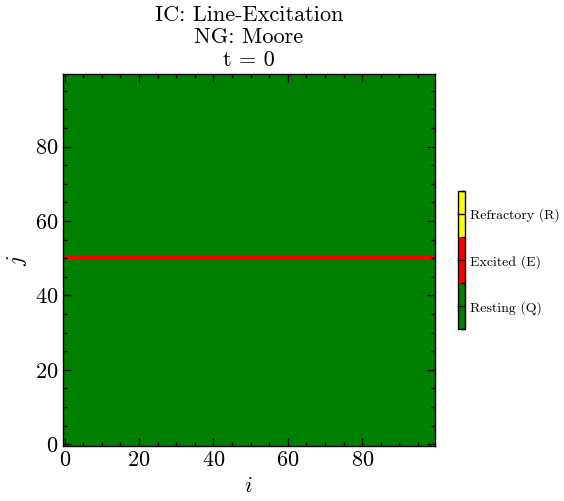

In [258]:
sol3.plot_frame(step=0)

In [259]:
sol3_gif = sol3.animate(outdir='figures_ex5')

Directory 'figures_ex5/ng_Moore_ic_Line-Excitation_N_100_steps_100' already exists.
Animation saved to 'figures_ex5/ng_Moore_ic_Line-Excitation_N_100_steps_100/excitable_media_animation.gif'


In [332]:
sol4 = ExcitableMediaCA(N=100, neighborhood_type='Moore')
grids_sol4 = sol4.simulate_steps(steps=100, initial_condition='Random-Excitation')

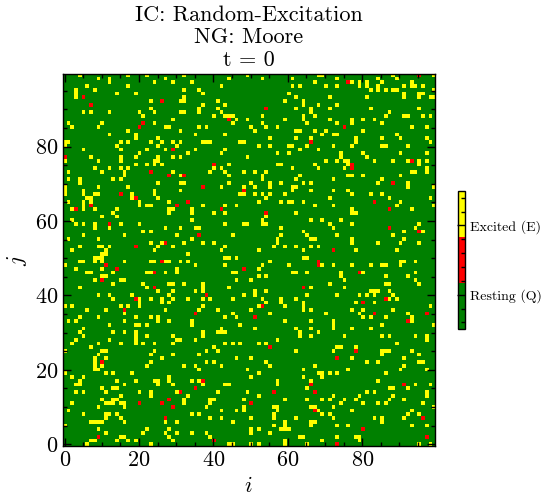

In [349]:
sol4.plot_frame(step=0)

In [325]:
gif_sol4 = sol4.animate(outdir='figures_ex5')

Directory 'figures_ex5/ng_Moore_ic_Random-Excitation_N_100_steps_100' already exists.
Animation saved to 'figures_ex5/ng_Moore_ic_Random-Excitation_N_100_steps_100/excitable_media_animation.gif'


In [326]:
# Flatten the array for spatiotemporal plot
spatio_temporal_4 = grids_sol4.reshape((grids_sol4.shape[0], -1))

# print(spatio_temporal_4.shape)
# print(np.unique(spatio_temporal_4[2]))

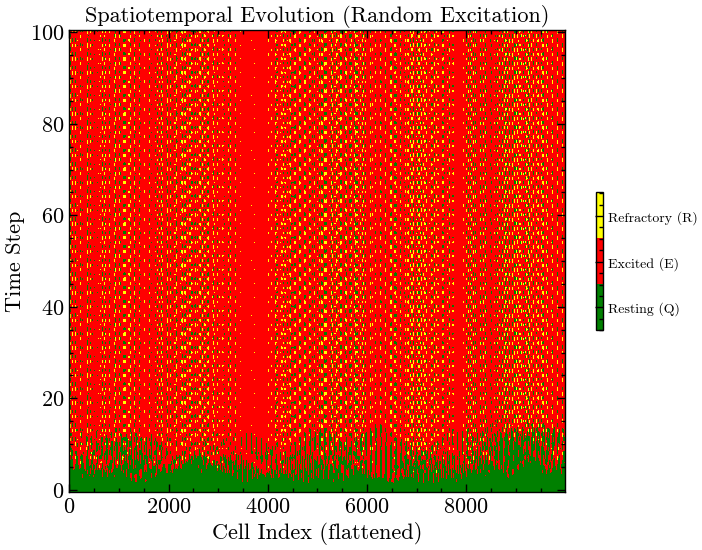

In [344]:
# Plot the spatiotemporal evolution
plt.figure(figsize=(8, 6))
plt.imshow(spatio_temporal_4, aspect='auto', cmap=sol4.cmap, origin='lower')
# Add the color code
cbar = plt.colorbar(ticks=[0.33, 0.99, 1.65], shrink=0.3)
cbar.ax.set_yticklabels(['Resting (Q)', 'Excited (E)', 'Refractory (R)'], fontsize=10)
plt.title('Spatiotemporal Evolution (Random Excitation)')
plt.xlabel('Cell Index (flattened)')
plt.ylabel('Time Step')
plt.savefig(f"{output_dir2}/spatiotemporal_random_excitation.png", dpi=300)
plt.show()

### Simulations Using Von Neumann Neighbors

In [263]:
solvn1 = ExcitableMediaCA(N=100, neighborhood_type='Von-Neumann')
grids_vn1 = solvn1.simulate_steps(steps=100, initial_condition='Single-Excitation')

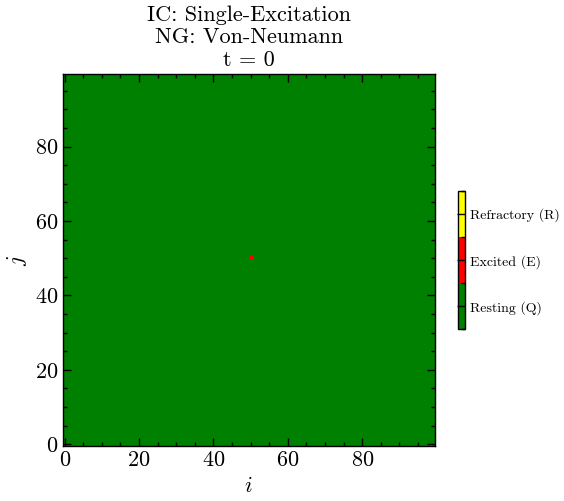

In [264]:
solvn1.plot_frame(step=0)

In [265]:
gif_vn1 = solvn1.animate(outdir='figures_ex5')

Directory 'figures_ex5/ng_Von-Neumann_ic_Single-Excitation_N_100_steps_100' already exists.
Animation saved to 'figures_ex5/ng_Von-Neumann_ic_Single-Excitation_N_100_steps_100/excitable_media_animation.gif'


In [266]:
solvn2 = ExcitableMediaCA(N=100, neighborhood_type='Von-Neumann')
grids_vn2 = solvn2.simulate_steps(steps=100, initial_condition='Multiple-Excitations')

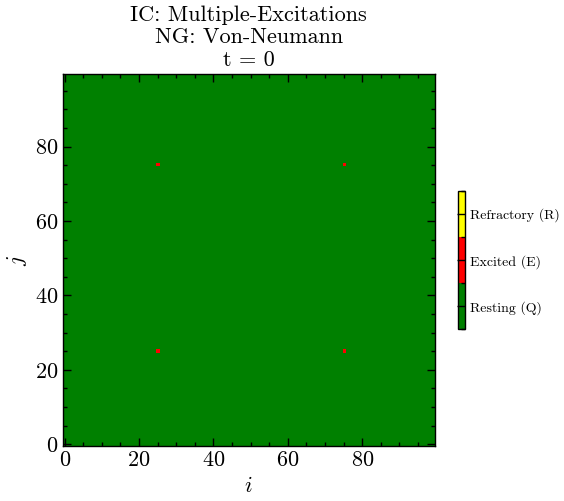

In [267]:
solvn2.plot_frame(step=0)

In [268]:
gif_vn2 = solvn2.animate(outdir='figures_ex5')

Directory 'figures_ex5/ng_Von-Neumann_ic_Multiple-Excitations_N_100_steps_100' already exists.
Animation saved to 'figures_ex5/ng_Von-Neumann_ic_Multiple-Excitations_N_100_steps_100/excitable_media_animation.gif'


In [277]:
solvn3 = ExcitableMediaCA(N=100, neighborhood_type='Von-Neumann')
grids_vn3 = solvn3.simulate_steps(steps=100, initial_condition='Line-Excitation')

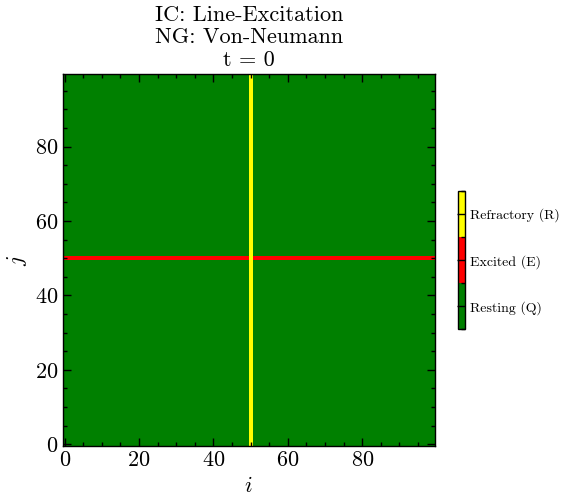

In [278]:
solvn3.plot_frame(step=0)

In [279]:
gif_vn3 = solvn3.animate(outdir='figures_ex5')

Directory 'figures_ex5/ng_Von-Neumann_ic_Line-Excitation_N_100_steps_100' already exists.
Animation saved to 'figures_ex5/ng_Von-Neumann_ic_Line-Excitation_N_100_steps_100/excitable_media_animation.gif'


In [378]:
solvn4 = ExcitableMediaCA(N=100, neighborhood_type='Von-Neumann')
grids_vn4 = solvn4.simulate_steps(steps=100, initial_condition='Random-Excitation')

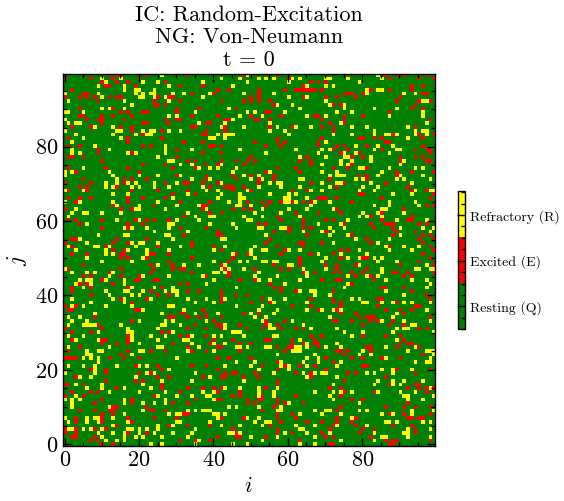

In [381]:
solvn4.plot_frame(step=0)

In [380]:
gif_vn4 = solvn4.animate(outdir='figures_ex5')

Directory 'figures_ex5/ng_Von-Neumann_ic_Random-Excitation_N_100_steps_100' already exists.
Animation saved to 'figures_ex5/ng_Von-Neumann_ic_Random-Excitation_N_100_steps_100/excitable_media_animation.gif'
